In [1]:
from transformers import AutoTokenizer, AutoModel
from bertviz import model_view
import torch
import matplotlib.pyplot as plt


# model_name='prajjwal1/bert-tiny'
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)



In [2]:
# Attention Maps
# You can also visualize attention maps directly using libraries like Matplotlib. This involves extracting attention weights from the model's layers and plotting them:
input_text = "The quick brown fox jumps over the lazy dog is not here."
tokens = tokenizer(input_text, return_tensors='pt')
with torch.no_grad():
    outputs = model(**tokens, output_attentions=True)
    attention_weights = outputs.attentions
    attention_weights=attention_weights[0].squeeze()
### this is the attention score for each encoder
print(attention_weights.shape)

torch.Size([12, 15, 15])


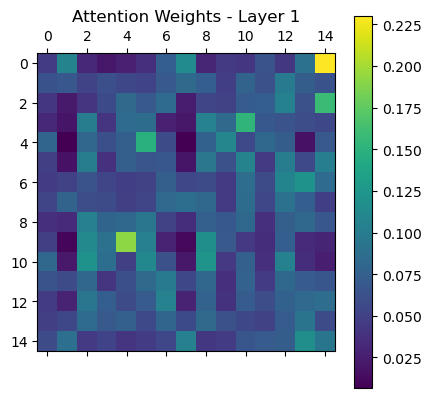

In [5]:
plt.matshow(attention_weights[0].numpy())
plt.title('Attention Weights - Layer 1')
plt.colorbar()
plt.show()

In [6]:
input_text = "The quick brown fox jumps over the lazy dog."
inputs = tokenizer.encode(input_text, return_tensors='pt')
outputs = model(inputs)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])
model_view(attention, tokens,display_mode='light')

<IPython.core.display.Javascript object>

In [6]:
model.encoder.layer[0].attention

BertAttention(
  (self): BertSelfAttention(
    (query): Linear(in_features=768, out_features=768, bias=True)
    (key): Linear(in_features=768, out_features=768, bias=True)
    (value): Linear(in_features=768, out_features=768, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (output): BertSelfOutput(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [18]:
model_layer0=model.encoder.layer[0]

In [19]:
for name,par in model_layer0.named_parameters():
    print(name,par.numel(),par.shape)

attention.self.query.weight 589824 torch.Size([768, 768])
attention.self.query.bias 768 torch.Size([768])
attention.self.key.weight 589824 torch.Size([768, 768])
attention.self.key.bias 768 torch.Size([768])
attention.self.value.weight 589824 torch.Size([768, 768])
attention.self.value.bias 768 torch.Size([768])
attention.output.dense.weight 589824 torch.Size([768, 768])
attention.output.dense.bias 768 torch.Size([768])
attention.output.LayerNorm.weight 768 torch.Size([768])
attention.output.LayerNorm.bias 768 torch.Size([768])
intermediate.dense.weight 2359296 torch.Size([3072, 768])
intermediate.dense.bias 3072 torch.Size([3072])
output.dense.weight 2359296 torch.Size([768, 3072])
output.dense.bias 768 torch.Size([768])
output.LayerNorm.weight 768 torch.Size([768])
output.LayerNorm.bias 768 torch.Size([768])
